In [ ]:
"""Notes:
1. Add more clusters (Use Categorical, not Bernoulli)
2. Add more dimensions
3. Group by genres, i.e. romance, scifi etc

https://pyro.ai/examples/gmm.html
"""

# Data 

In [53]:
import os
import pandas as pd

# The movies database
tmdb_path = os.path.join("../","data","the-movies-dataset")

ratings_dir = os.path.join(tmdb_path, "ratings.csv")
ratings_small_dir = os.path.join(tmdb_path, "ratings_small.csv")
movies_metadata_dir = os.path.join(tmdb_path, "movies_metadata.csv")
links_dir = os.path.join(tmdb_path, "links.csv")
links_small_dir = os.path.join(tmdb_path, "links_small.csv")
keywords_dir = os.path.join(tmdb_path, "keywords.csv")
credits_dir = os.path.join(tmdb_path, "credits.csv")

In [54]:
# Ratings small
ratings_small = pd.read_csv(ratings_small_dir)
ratings_small

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [156]:
# Movies metadata
movies_metadata = pd.read_csv(movies_metadata_dir)

# Transform the column from string to list of dict
movies_metadata['genres'] = movies_metadata['genres'].apply(lambda x: eval(x))

# Transform list of dict into list
movies_metadata['genres'] = movies_metadata['genres'].apply(lambda x: [genre['name'] for genre in x])

movies_metadata

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[Drama, Family]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,[Drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[Action, Drama, Thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [138]:
# Links
pd.read_csv(links_small_dir)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0


In [57]:
pd.read_csv(keywords_dir)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [59]:
# Pick one movie (id=31) and cluster users by ratings
ratings_small_sample = ratings_small[ratings_small['movieId']==31]
data = torch.tensor(ratings_small['rating'].values, dtype=torch.float32)

In [60]:
# 1. using the meta data
# 2. only focus on movies that are watched by a lot of the users, 
# 3. use pca or another dimensionality reduction method to make the # of features (movies) for each user less, then use GMM

In [202]:
# 2. find the top K most rated movies

top_movieId = (ratings_small.groupby(['movieId'])
    .agg(['count'])['userId']['count']
    .sort_values(ascending=False)
)
top_movieId[:10]

movieId
356     341
296     324
318     311
593     304
260     291
480     274
2571    259
1       247
527     244
589     237
Name: count, dtype: int64

In [193]:
# 1. group by genres
import json

temp = movies_metadata[['id', 'genres']]
temp

# MAGIC HERE!
# Create a movie genres table
# https://stackoverflow.com/questions/39954668/how-to-convert-column-with-list-of-values-into-rows-in-pandas-dataframe
movies_genres = (temp['genres']
    .apply(lambda x: pd.Series(x))
    .stack().reset_index(level=1, drop=True)
    .to_frame('genres')
    .join(temp[['id']], how='left')
)
movies_genres

,genres,id
0,Animation,862
0,Comedy,862
0,Family,862
1,Adventure,8844
1,Fantasy,8844
...,...,...
45461,Family,439050
45462,Drama,111109
45463,Action,67758
45463,Drama,67758


In [196]:
# Select movies with Comedy only
movies_comedy_id = movies_genres[movies_genres['genres'] == 'Comedy']['id']

array(['862', '15602', '31357', ..., '49271', '106807', '420346'],
      dtype=object)

# Method 1 (Pyro Tutorial)

In [ ]:
import os
from collections import defaultdict
import numpy as np
import scipy.stats
import torch
import pandas as pd
from torch.distributions import constraints
from matplotlib import pyplot
%matplotlib inline

import pyro
import pyro.distributions as dist
from pyro import poutine
from pyro.infer.autoguide import AutoDelta
from pyro.optim import Adam
from pyro.infer import SVI, TraceEnum_ELBO, config_enumerate, infer_discrete

smoke_test = ('CI' in os.environ)
assert pyro.__version__.startswith('0.4.1')
pyro.enable_validation(True)

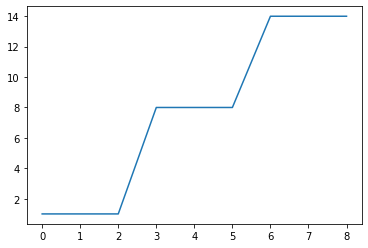

In [30]:
# Create fake dataset
#data = torch.tensor([[0., 1., 10., 11., 12.],[0, 1, 5, 2, 10]])
#pyplot.scatter(data[0], data[1])

data = torch.tensor([1., 1., 1., 8., 8., 8., 14, 14, 14])
pyplot.plot(data)

In [52]:
K = 3  # Fixed number of components.

# = 1 dimension
@config_enumerate
def model(data):
    # Global variables.
    weights = pyro.sample('weights', dist.Dirichlet(0.5 * torch.ones(K)))
    scale = pyro.sample('scale', dist.LogNormal(0., 2.))
    with pyro.plate('components', K):
        locs = pyro.sample('locs', dist.Normal(0., 10.))

    with pyro.plate('data', len(data)):
        # Local variables.
        # Multinomial Dirichlet
        assignment = pyro.sample('assignment', dist.Categorical(weights))
        pyro.sample('obs', dist.Normal(locs[assignment], scale), obs=data)

# > 1 dimensions
# @config_enumerate      
# def model(data):
#     # Global variables.
#     weights = pyro.sample('weights', dist.Dirichlet(0.5 * torch.ones(K)))
#     scale = pyro.sample('scale', dist.LogNormal(0., 2.))
#     with pyro.plate('components', K):
#         locs = pyro.sample('locs', dist.Normal(torch.zeros(2), 10.).independent(1))
#         assert locs.shape == (K, 2)
#     with pyro.plate('data', len(data)):
#         # Local variables.
#         assignment = pyro.sample('assignment', dist.Categorical(weights))
#         pyro.sample('obs', dist.Normal(locs[assignment], scale).independent(1),
#                     obs=data)

global_guide = AutoDelta(poutine.block(model, expose=['weights', 'locs', 'scale']))

In [50]:
optim = pyro.optim.Adam({'lr': 0.1, 'betas': [0.8, 0.99]})
elbo = TraceEnum_ELBO(max_plate_nesting=1)
svi = SVI(model, global_guide, optim, loss=elbo)

In [51]:
def initialize(seed):
    pyro.set_rng_seed(seed)
    pyro.clear_param_store()
    # Initialize weights to uniform.
    pyro.param('auto_weights', 0.5 * torch.ones(K), constraint=constraints.simplex)
    # Assume half of the data variance is due to intra-component noise.
    pyro.param('auto_scale', (data.var() / 2).sqrt(), constraint=constraints.positive)
    # Initialize means from a subsample of data.
    pyro.param('auto_locs', data[torch.multinomial(torch.ones(len(data)) / len(data), K)]);
    loss = svi.loss(model, global_guide, data)
    return loss

# Choose the best among 100 random initializations.
loss, seed = min((initialize(seed), seed) for seed in range(100))
initialize(seed)
print('seed = {}, initial_loss = {}'.format(seed, loss))

AttributeError: 'Tensor' object has no attribute 'support'

In [34]:
# Register hooks to monitor gradient norms.
gradient_norms = defaultdict(list)
for name, value in pyro.get_param_store().named_parameters():
    value.register_hook(lambda g, name=name: gradient_norms[name].append(g.norm().item()))

losses = []
for i in range(200 if not smoke_test else 2):
    loss = svi.step(data)
    losses.append(loss)
    print('.' if i % 100 else '\n', end='')


...................................................................................................
...................................................................................................

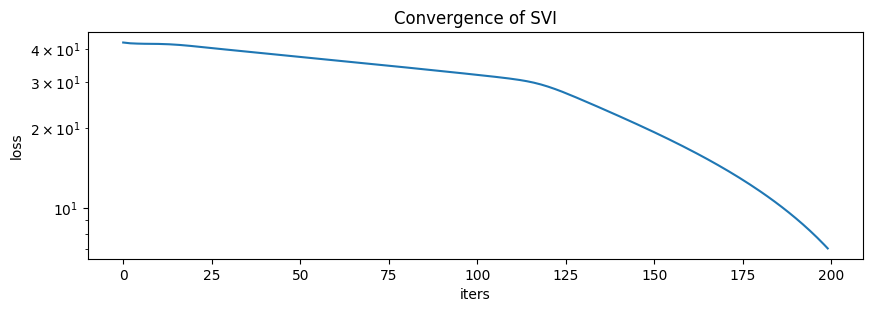

In [35]:
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(losses)
pyplot.xlabel('iters')
pyplot.ylabel('loss')
pyplot.yscale('log')
pyplot.title('Convergence of SVI');

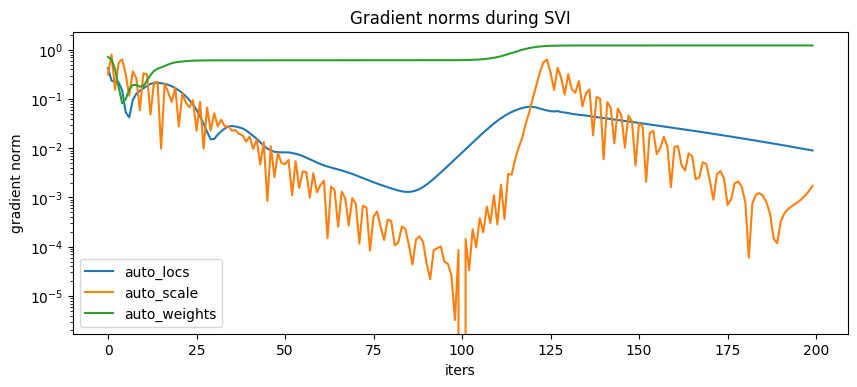

In [36]:
pyplot.figure(figsize=(10,4), dpi=100).set_facecolor('white')
for name, grad_norms in gradient_norms.items():
    pyplot.plot(grad_norms, label=name)
pyplot.xlabel('iters')
pyplot.ylabel('gradient norm')
pyplot.yscale('log')
pyplot.legend(loc='best')
pyplot.title('Gradient norms during SVI');

In [37]:
map_estimates = global_guide(data)
weights = map_estimates['weights']
locs = map_estimates['locs']
scale = map_estimates['scale']
print('weights = {}'.format(weights.data.numpy()))
print('locs = {}'.format(locs.data.numpy()))
print('scale = {}'.format(scale.data.numpy()))

weights = [4.6293169e-12 5.5208256e-21 1.0000000e+00]
locs = [8.738409e-01 7.659689e-06 7.463825e+00]
scale = 4.945127487182617


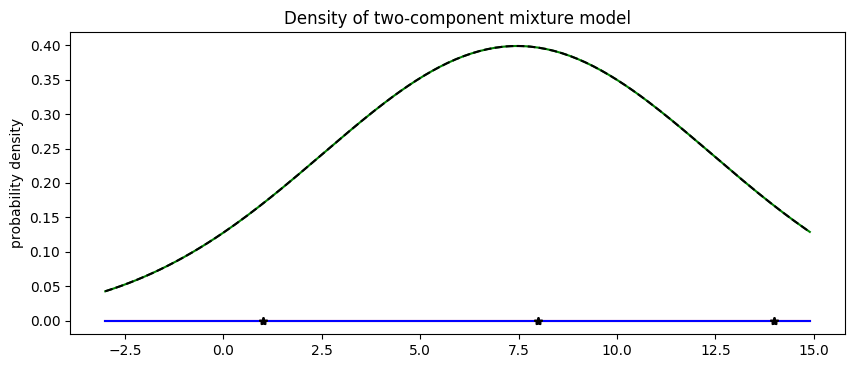

In [38]:
X = np.arange(-3,15,0.1)
Y1 = weights[0].item() * scipy.stats.norm.pdf((X - locs[0].item()) / scale.item())
Y2 = weights[1].item() * scipy.stats.norm.pdf((X - locs[1].item()) / scale.item())
Y3 = weights[2].item() * scipy.stats.norm.pdf((X - locs[2].item()) / scale.item())

pyplot.figure(figsize=(10, 4), dpi=100).set_facecolor('white')
pyplot.plot(X, Y1, 'r-')
pyplot.plot(X, Y2, 'b-')
pyplot.plot(X, Y3, 'g-')
pyplot.plot(X, Y1 + Y2 + Y3, 'k--')
pyplot.plot(data.data.numpy(), np.zeros(len(data)), 'k*')
pyplot.title('Density of two-component mixture model')
pyplot.ylabel('probability density');

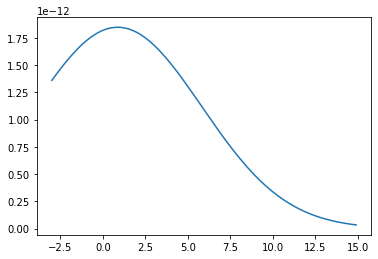

In [42]:
pyplot.plot(X, Y1) #

In [43]:
# Get the posterior
from pyro.infer.mcmc.api import MCMC
from pyro.infer.mcmc import NUTS
pyro.set_rng_seed(2)
kernel = NUTS(model)
mcmc = MCMC(kernel, num_samples=250, warmup_steps=50)
mcmc.run(data)
posterior_samples = mcmc.get_samples()

sample: 100%|██████████| 300/300 [00:12<00:00, 24.36it/s, step size=3.32e-02, acc. prob=0.348]


In [47]:
#posterior_samples["locs"]
X, Y, Z = posterior_samples["locs"].t()

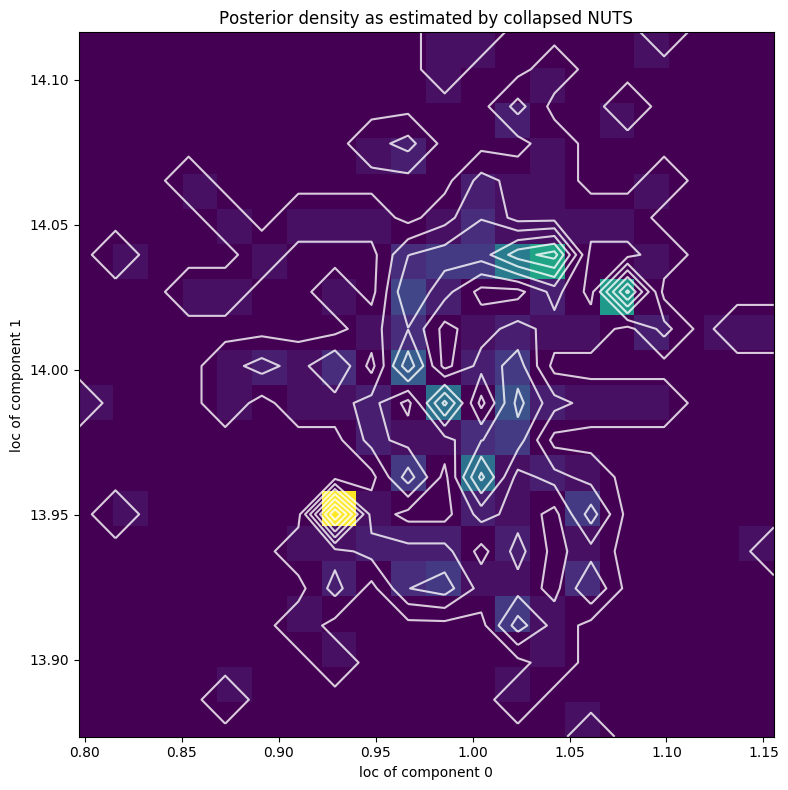

In [48]:
pyplot.figure(figsize=(8, 8), dpi=100).set_facecolor('white')
h, xs, ys, image = pyplot.hist2d(X.numpy(), Y.numpy(), bins=[20, 20])
pyplot.contour(np.log(h + 3).T, extent=[xs.min(), xs.max(), ys.min(), ys.max()],
               colors='white', alpha=0.8)
pyplot.title('Posterior density as estimated by collapsed NUTS')
pyplot.xlabel('loc of component 0')
pyplot.ylabel('loc of component 1')
pyplot.tight_layout()

# Method 2

In [ ]:
# Source: https://github.com/mcdickenson/em-gaussian/blob/master/em-gaussian-pyro.py
import matplotlib.pyplot as plt
import numpy as np
import pyro
import pyro.distributions as dist
import torch

from matplotlib.patches import Ellipse
from pyro import poutine
from pyro.contrib.autoguide import AutoDelta
from pyro.infer import SVI, TraceEnum_ELBO, config_enumerate
from torch.distributions import constraints

In [ ]:
@config_enumerate(default='parallel')
@poutine.broadcast
def model(data):
    # Global variables.
    """2 clusters"""
    #weights = pyro.param('weights', torch.FloatTensor([0.5]), constraint=constraints.unit_interval)
    #scales = pyro.param('scales', torch.tensor([[[1., 0.], [0., 2.]], [[3., 0.], [0., 4.]]]), constraint=constraints.positive)
    #locs = pyro.param('locs', torch.tensor([[1., 2.], [3., 4.]]))
    
    """3 clusters"""
    weights = pyro.param('weights', torch.FloatTensor([0.5]), constraint=constraints.unit_interval)
    scales = pyro.param('scales', torch.tensor([[[1., 0.], [0., 2.]], [[2., 0.], [0., 2.]], [[3., 0.], [0., 3.]]]), constraint=constraints.positive)
    locs = pyro.param('locs', torch.tensor([[0., 20.], [20., 0.], [10., 10.]]))

    with pyro.iarange('data', data.size(0)):
        # Local variables.
        assignment = pyro.sample('assignment', dist.Bernoulli(torch.ones(len(data)) * weights)).to(torch.int64)
        pyro.sample('obs', dist.MultivariateNormal(locs[assignment], scales[assignment]), obs=data)


@config_enumerate(default="parallel")
@poutine.broadcast
def full_guide(data):
    with pyro.iarange('data', data.size(0)):
        # Local variables.
        assignment_probs = pyro.param('assignment_probs', torch.ones(len(data)) / K,
                                      constraint=constraints.unit_interval)
        pyro.sample('assignment', dist.Bernoulli(assignment_probs), infer={"enumerate": "sequential"})

def initialize(data):
    pyro.clear_param_store()

    optim = pyro.optim.Adam({'lr': 0.1, 'betas': [0.8, 0.99]})
    elbo = TraceEnum_ELBO(max_iarange_nesting=1)
    svi = SVI(model, full_guide, optim, loss=elbo)

    # Initialize weights to uniform.
    pyro.param('auto_weights', 0.5 * torch.ones(K), constraint=constraints.simplex)

    # Assume half of the data variance is due to intra-component noise.
    var = (data.var() / 2).sqrt()
    pyro.param('auto_scale', torch.tensor([var]*4), constraint=constraints.positive)

    # Initialize means from a subsample of data.
    pyro.param('auto_locs', data[torch.multinomial(torch.ones(len(data)) / len(data), K)])

    loss = svi.loss(model, full_guide, data)

    return loss, svi

In [ ]:
def get_samples():
    num_samples = 100

    # 2 clusters
    # note that both covariance matrices are diagonal
    mu1 = torch.tensor([0., 20.])
    sig1 = torch.tensor([[2., 0.], [0., 3.]])

    mu2 = torch.tensor([20., 0.])
    sig2 = torch.tensor([[4., 0.], [0., 1.]])
    
    # add 3rd cluster
    mu3 = torch.tensor([10., 10.])
    sig3 = torch.tensor([[5., 0.], [0., 10.]])
    

    # generate samples
    dist1 = dist.MultivariateNormal(mu1, sig1)
    samples1 = [pyro.sample('samples1', dist1) for _ in range(num_samples)]

    dist2 = dist.MultivariateNormal(mu2, sig2)
    samples2 = [pyro.sample('samples2', dist2) for _ in range(num_samples)]
    
    dist3 = dist.MultivariateNormal(mu3, sig3)
    samples3 = [pyro.sample('samples2', dist3) for _ in range(num_samples)]

    data = torch.cat((torch.stack(samples1), torch.stack(samples2), torch.stack(samples3)))
    return data

In [ ]:
def plot(data, mus=None, sigmas=None, colors='black', figname='fig.png'):
    # Create figure
    fig = plt.figure()

    # Plot data
    x = data[:, 0]
    y = data[:, 1]
    plt.scatter(x, y, 24, c=colors)

    # Plot cluster centers
    if mus is not None:
        x = [float(m[0]) for m in mus]
        y = [float(m[1]) for m in mus]
        plt.scatter(x, y, 99, c='red')

    # Plot ellipses for each cluster
    if sigmas is not None:
        for sig_ix in range(K):
            ax = fig.gca()
            cov = np.array(sigmas[sig_ix])
            lam, v = np.linalg.eig(cov)
            lam = np.sqrt(lam)
            ell = Ellipse(xy=(x[sig_ix], y[sig_ix]),
                          width=lam[0]*4, height=lam[1]*4,
                          angle=np.rad2deg(np.arccos(v[0, 0])),
                          color='blue')
            ell.set_facecolor('none')
            ax.add_artist(ell)

    # Save figure
    fig.savefig(figname)

In [ ]:
if __name__ == "__main__":
    pyro.enable_validation(True)
    pyro.set_rng_seed(42)

    # Create our model with a fixed number of components
    K = 3

    data = get_samples()

    global_guide = AutoDelta(poutine.block(model, expose=['weights', 'locs', 'scales']))
    global_guide = config_enumerate(global_guide, 'parallel')
    _, svi = initialize(data)
    
    num_samples = 100
    true_colors = [0] * num_samples + [1] * num_samples + [2] * num_samples
    plot(data, colors=true_colors, figname='pyro_init.png')

    for i in range(151):
        svi.step(data)

        if i % 50 == 0:
            locs = pyro.param('locs')
            scales = pyro.param('scales')
            weights = pyro.param('weights')
            assignment_probs = pyro.param('assignment_probs')

            print("locs: {}".format(locs))
            print("scales: {}".format(scales))
            print('weights = {}'.format(weights))
            print('assignments: {}'.format(assignment_probs))

            # todo plot data and estimates
            assignments = np.uint8(np.round(assignment_probs.data))
            plot(data, locs.data, scales.data, assignments, figname='pyro_iteration{}.png'.format(i))